In [1]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from helpers import *
%matplotlib inline

In [2]:
# generate data
xobs = -np.pi + 2*np.pi*np.random.random(50)
yobs = -np.sin(xobs)**3 + np.cos(xobs)**3 + 0.1*np.random.randn(len(xobs))

In [3]:
# define the fitting grid
xfittest = np.linspace(-np.pi,np.pi,50)
ytrue = -np.sin(xfittest)**3 + np.cos(xfittest)**3
n = len(xfittest)

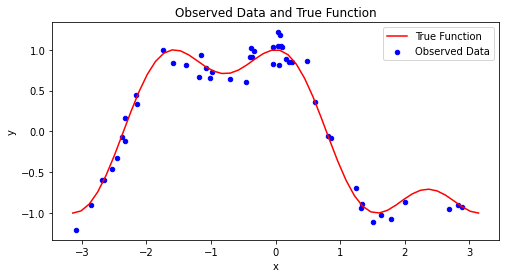

In [12]:
fig = plt.figure(figsize=(8,4))
plt.scatter(xobs, yobs, label='Observed Data', color='blue', s=20)
plt.plot(xfittest, ytrue, label='True Function', color='red')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data and True Function')
plt.savefig("toy_samples_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

Best parameters: corrlen=0.3111111111111111, sigma=2.0, energy=0.9444444444444444
        Model  Mean Squared Error  Root Mean Squared Error  \
0  exp square            0.004708                 0.068617   
1    rat quad            0.005662                 0.075247   
2     orn uhl            0.024646                 0.156989   

   Mean Absolute Error  R2 Score  
0             0.060596  0.992551  
1             0.063202  0.991042  
2             0.121015  0.961010  


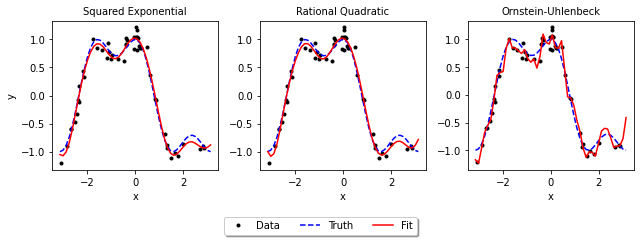

In [5]:
perf_df, fig = fit_gp_gammy(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure1.pdf", format="pdf", bbox_inches="tight")
print(perf_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.004708                 0.068617   
1                       rat quad            0.005662                 0.075247   
2                        orn uhl            0.024646                 0.156989   
3                         Smooth            0.013664                 0.116893   
4              Smooth + Periodic            0.011505                 0.107259   
5  Smooth + Periodic + Symmetric            0.008698                 0.093265   

   Mean Absolute Error  R2 Score  
0             0.060596  0.992551  
1             0.063202  0.991042  
2             0.121015  0.961010  
3             0.086421  0.978383  
4             0.078139  0.981800  
5             0.060775  0.986239  


<Figure size 648x216 with 0 Axes>

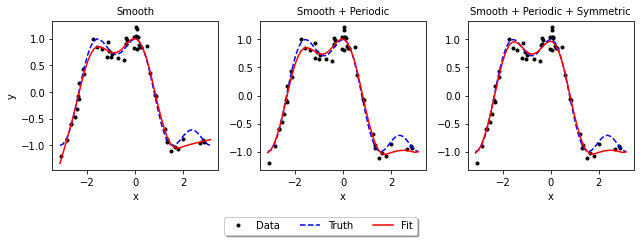

In [6]:
perf_lm, fig = fit_difference_priors(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig.savefig("toy_samples_figures/figure2.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([perf_df, perf_lm], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.004708                 0.068617   
1                       rat quad            0.005662                 0.075247   
2                        orn uhl            0.024646                 0.156989   
3                         Smooth            0.013664                 0.116893   
4              Smooth + Periodic            0.011505                 0.107259   
5  Smooth + Periodic + Symmetric            0.008698                 0.093265   
6              Linear Regression            0.566465                 0.752639   

   Mean Absolute Error  R2 Score  
0             0.060596  0.992551  
1             0.063202  0.991042  
2             0.121015  0.961010  
3             0.086421  0.978383  
4             0.078139  0.981800  
5             0.060775  0.986239  
6             0.687517  0.103836  


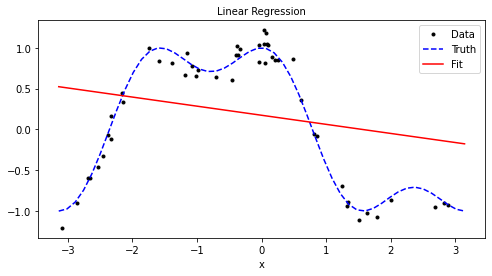

In [7]:
perf_df2, fig2 = fit_linear_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig2.savefig("toy_samples_figures/figure3.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_df2], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.004708                 0.068617   
1                       rat quad            0.005662                 0.075247   
2                        orn uhl            0.024646                 0.156989   
3                         Smooth            0.013664                 0.116893   
4              Smooth + Periodic            0.011505                 0.107259   
5  Smooth + Periodic + Symmetric            0.008698                 0.093265   
6              Linear Regression            0.566465                 0.752639   
7                  Random Forest            0.012488                 0.111751   

   Mean Absolute Error  R2 Score  
0             0.060596  0.992551  
1             0.063202  0.991042  
2             0.121015  0.961010  
3             0.086421  0.978383  
4             0.078139  0.981800  
5             0.060775  0.986239  
6             0.687517  0

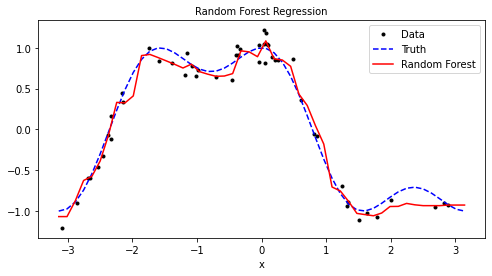

In [8]:
perf_rf, fig3 = fit_rf_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig3.savefig("toy_samples_figures/figure4.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf_rf], ignore_index=True)
print(combined_df)
plt.show()

                           Model  Mean Squared Error  Root Mean Squared Error  \
0                     exp square            0.004708                 0.068617   
1                       rat quad            0.005662                 0.075247   
2                        orn uhl            0.024646                 0.156989   
3                         Smooth            0.013664                 0.116893   
4              Smooth + Periodic            0.011505                 0.107259   
5  Smooth + Periodic + Symmetric            0.008698                 0.093265   
6              Linear Regression            0.566465                 0.752639   
7                  Random Forest            0.012488                 0.111751   
8                Frequentist GAM            0.016909                 0.130034   

   Mean Absolute Error  R2 Score  
0             0.060596  0.992551  
1             0.063202  0.991042  
2             0.121015  0.961010  
3             0.086421  0.978383  
4             

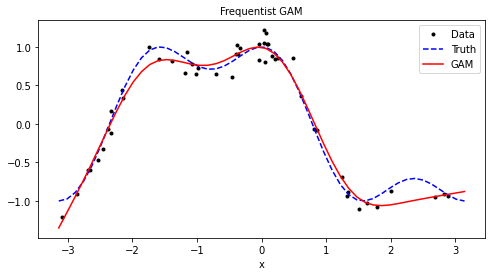

In [9]:
perf4, fig4 = fit_gam_regression(xobs=xobs, yobs=yobs, xfit=xfittest, ytrue=ytrue)
fig4.savefig("toy_samples_figures/figure5.pdf", format="pdf", bbox_inches="tight")
combined_df = pd.concat([combined_df, perf4], ignore_index=True)
print(combined_df)
plt.show()

In [10]:
result = pd.DataFrame(combined_df)
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,exp square,0.00471,0.06862,0.06060,0.99255
1,rat quad,0.00566,0.07525,0.06320,0.99104
2,orn uhl,0.02465,0.15699,0.12102,0.96101
3,Smooth,0.01366,0.11689,0.08642,0.97838
4,Smooth + Periodic,0.01150,0.10726,0.07814,0.98180
5,Smooth + Periodic + Symmetric,0.00870,0.09327,0.06077,0.98624
6,Linear Regression,0.56647,0.75264,0.68752,0.10384
7,Random Forest,0.01249,0.11175,0.09314,0.98024
8,Frequentist GAM,0.01691,0.13003,0.09860,0.97325
